In [31]:
from typing import List
import numpy as np
from vector_space_model import VectorSpaceModel

In [32]:
vector_space_model = VectorSpaceModel(
    documents_path="ResearchPapers",
    stop_words_file_path="Stopword-List.txt",
)
vector_space_model.initiate()

Preprocessed data not found. The system is going to make new indexes.
Stop words loaded successfully.
Parsing	ResearchPapers\1.txt
Parsing	ResearchPapers\11.txt
Parsing	ResearchPapers\12.txt
Parsing	ResearchPapers\13.txt
Parsing	ResearchPapers\14.txt
Parsing	ResearchPapers\15.txt
Parsing	ResearchPapers\16.txt
Parsing	ResearchPapers\17.txt
Parsing	ResearchPapers\18.txt
Parsing	ResearchPapers\2.txt
Parsing	ResearchPapers\21.txt
Parsing	ResearchPapers\22.txt
Parsing	ResearchPapers\23.txt
Parsing	ResearchPapers\24.txt
Parsing	ResearchPapers\25.txt
Parsing	ResearchPapers\26.txt
Parsing	ResearchPapers\3.txt
Parsing	ResearchPapers\7.txt
Parsing	ResearchPapers\8.txt
Parsing	ResearchPapers\9.txt

Saving all computed indexes on the drive.
Total entires in the collection	20.


1

In [33]:
import numpy as np 

X = []
doc_seq = []
for i in vector_space_model.vsm_index:
    doc_seq.append(int(i[0]))
    X.append(i[1])
y = vector_space_model.make_y(doc_seq=doc_seq)
X = np.array(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0231434 , 0.01361679, 0.02465035, ..., 0.        , 0.        ,
        0.        ],
       [0.00343183, 0.00173072, 0.00199379, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00322744, 0.        , ..., 0.        , 0.        ,
        0.        ]])

Number of elements assigned to each cluster: [2 6 4 5 3]
Number of elements assigned to each cluster: [1 4 7 3 5]
Number of elements assigned to each cluster: [1 8 4 4 3]
Number of elements assigned to each cluster: [3 6 4 5 2]
Number of elements assigned to each cluster: [2 6 5 3 4]

True number of documents in each labels:     [4 3 5 3 5]


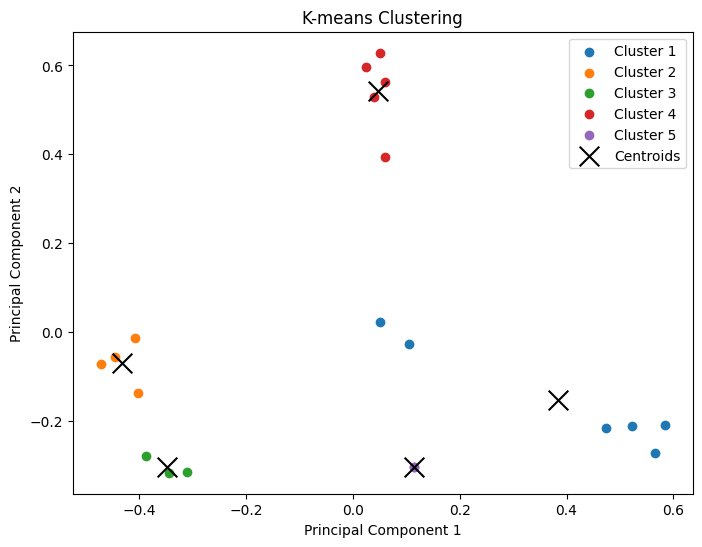

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

for seed in range(5):
    kmeans = KMeans(
        n_clusters=5,
        max_iter=100,
        n_init="auto",
        random_state=seed,
    ).fit(X)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each labels:     "
    f"[4 3 5 3 5]"
)

# fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

# Apply K-means clustering with the best K
kmeans = KMeans(n_clusters=5, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans.fit(X)
labels = kmeans.labels_


pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
centroids2D = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))

for i in range(5):
    plt.scatter(data2D[labels == i, 0], data2D[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centroids2D[:, 0], centroids2D[:, 1], marker='x', s=200, c='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()